LABWORK 1: House Pricing


In [ ]:
!pip install pandas numpy matplotlib scikit-learn


DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\bs4-0.0.2-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\lxml-5.3.0-py3.13-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\narwhals-1.19.0-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\l

In [ ]:
# Cell 1: Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Cell 2: Load và clean dữ liệu
def load_and_clean_data(path):
    df = pd.read_csv(path)
    df.columns = [col.strip() for col in df.columns]
    df = df.rename(columns={
        'X2 house age': 'House Age',
        'X3 distance to the nearest MRT station': 'Distance to MRT',
        'X4 number of convenience stores': 'Convenience Stores',
        'X5 latitude': 'Latitude',
        'X6 longitude': 'Longitude',
        'Y house price of unit area': 'Price'
    })
    df = df.drop(columns=['No', 'X1 transaction date'])
    return df


In [ ]:
# Cell 3: Chia train/test
def split_data(df, test_size=0.2, random_state=42):
    X = df.drop(columns=['Price'])
    y = df['Price']
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


In [ ]:
# Cell 4: Hàm train hồi quy đơn giản (tùy chọn normalization)
def train_simple_regression(X_train, y_train, X_test, y_test, feature, normalize=False):
    if normalize:
        model = make_pipeline(StandardScaler(), LinearRegression())
    else:
        model = LinearRegression()
    model.fit(X_train[[feature]], y_train)
    y_pred = model.predict(X_test[[feature]])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    intercept = model.named_steps['linearregression'].intercept_ if normalize else model.intercept_
    slope = model.named_steps['linearregression'].coef_[
        0] if normalize else model.coef_[0]
    # Vẽ đồ thị
    plt.figure()
    plt.scatter(X_test[feature], y_test, alpha=0.6, marker='x')
    plt.plot(X_test[feature], y_pred, linewidth=2)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'{feature} vs Price {"(Normalized)" if normalize else ""}')
    plt.show()
    return intercept, slope, rmse, mae, r2


In [ ]:
# Cell 5: Hàm train hồi quy bội (tùy chọn normalization)
def train_multiple_regression(X_train, y_train, X_test, y_test, normalize=False):
    if normalize:
        model = make_pipeline(StandardScaler(), LinearRegression())
    else:
        model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    intercept = model.named_steps['linearregression'].intercept_ if normalize else model.intercept_
    coeffs = model.named_steps['linearregression'].coef_ if normalize else model.coef_
    return intercept, coeffs, rmse, mae, r2


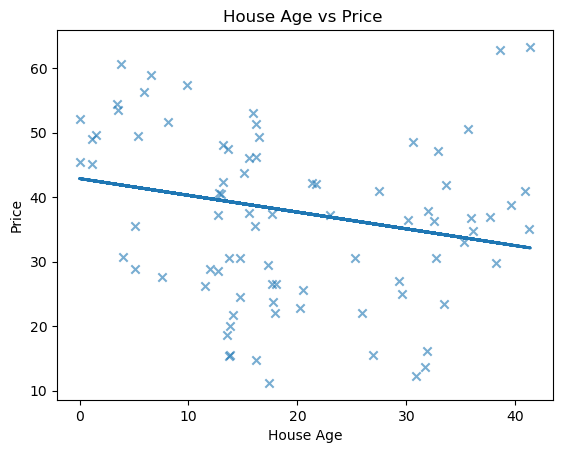

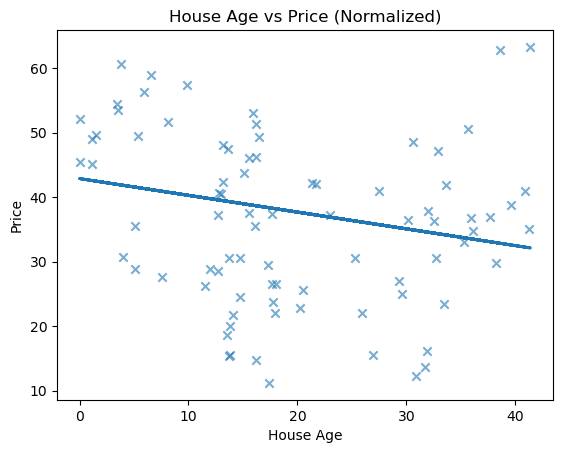

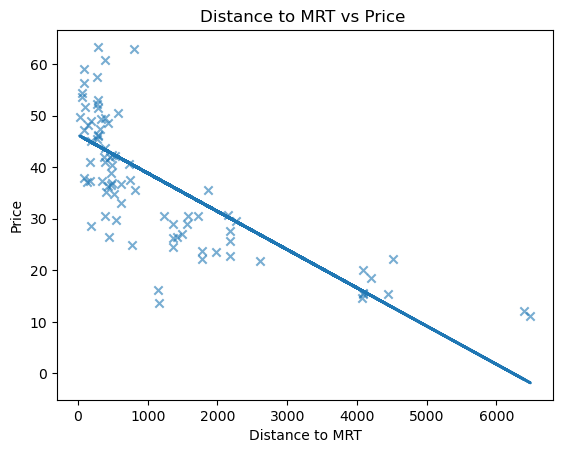

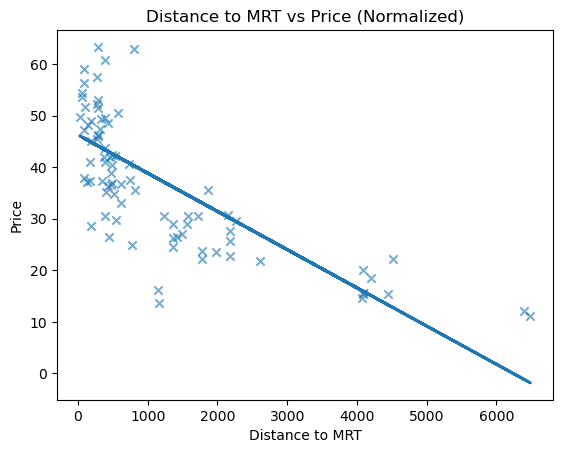

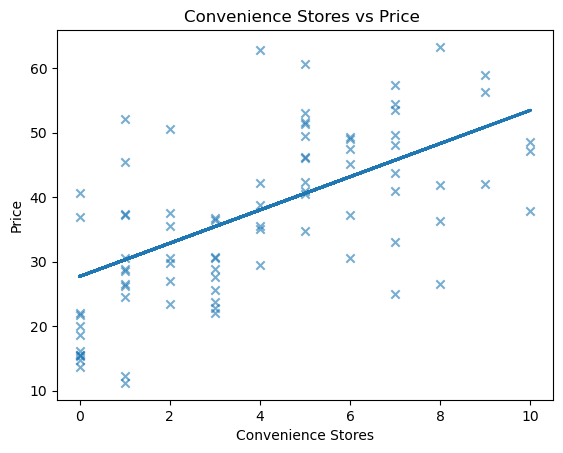

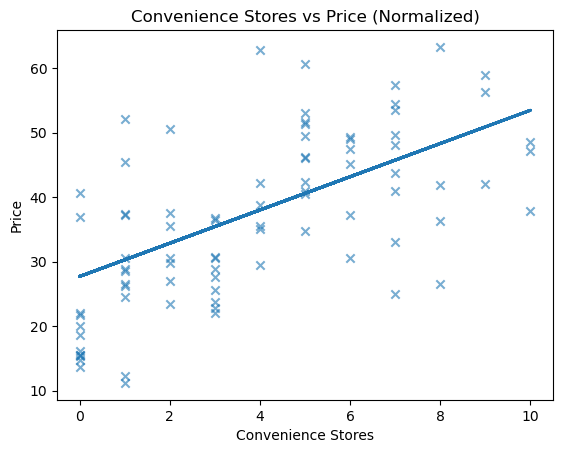

,Feature/Model,Normalized,Intercept,Slope/Coeffs,RMSE,MAE,R2
0,House Age,No,42.882896,-0.259784,12.853214,10.621235,0.015228
1,House Age,Yes,38.391541,-2.938196,12.853214,10.621235,0.015228
2,Distance to MRT,No,46.242690,-0.00741,8.794543,6.920973,0.538960
3,Distance to MRT,Yes,38.391541,-9.010623,8.794543,6.920973,0.538960
4,Convenience Stores,No,27.708222,2.57739,10.086545,8.345511,0.393547
5,Convenience Stores,Yes,38.391541,7.601335,10.086545,8.345511,0.393547
6,Multiple,No,-2946.658859,"[-0.2705932358164285, -0.004552496013786681, 1...",7.387892,5.350138,0.674648
7,Multiple,Yes,38.391541,"[-3.060452126184252, -5.536237613429094, 3.259...",7.387892,5.350138,0.674648


In [ ]:
# Cell 6: Thực thi các nhiệm vụ
# 1. Load & clean
from IPython.display import display
df = load_and_clean_data(
    r'E:\MSE\HomeWork\Ky 2\MLE501.9\Test\Lab\Lab 1\Real estate.csv')
# 2. Split
X_train, X_test, y_train, y_test = split_data(df)

# 2. Simple Regression (House Age)
age_metrics = train_simple_regression(
    X_train, y_train, X_test, y_test, 'House Age', normalize=False)
age_norm_metrics = train_simple_regression(
    X_train, y_train, X_test, y_test, 'House Age', normalize=True)

# 3. Two other features
dist_metrics = train_simple_regression(
    X_train, y_train, X_test, y_test, 'Distance to MRT', normalize=False)
dist_norm_metrics = train_simple_regression(
    X_train, y_train, X_test, y_test, 'Distance to MRT', normalize=True)

store_metrics = train_simple_regression(
    X_train, y_train, X_test, y_test, 'Convenience Stores', normalize=False)
store_norm_metrics = train_simple_regression(
    X_train, y_train, X_test, y_test, 'Convenience Stores', normalize=True)

# 4. Multiple Regression
multi_metrics = train_multiple_regression(
    X_train, y_train, X_test, y_test, normalize=False)
multi_norm_metrics = train_multiple_regression(
    X_train, y_train, X_test, y_test, normalize=True)

# 5. Tổng hợp kết quả
results = pd.DataFrame([
    ['House Age', 'No', *age_metrics],
    ['House Age', 'Yes', *age_norm_metrics],
    ['Distance to MRT', 'No', *dist_metrics],
    ['Distance to MRT', 'Yes', *dist_norm_metrics],
    ['Convenience Stores', 'No', *store_metrics],
    ['Convenience Stores', 'Yes', *store_norm_metrics],
    ['Multiple', 'No', multi_metrics[0], multi_metrics[1],
        multi_metrics[2], multi_metrics[3], multi_metrics[4]],
    ['Multiple', 'Yes', multi_norm_metrics[0], multi_norm_metrics[1].tolist(
    ), multi_norm_metrics[2], multi_norm_metrics[3], multi_norm_metrics[4]],
], columns=['Feature/Model', 'Normalized', 'Intercept', 'Slope/Coeffs', 'RMSE', 'MAE', 'R2'])

display(results)
